In [1]:
## Подгружаем библиотеки
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()
from sklearn import decomposition
from sklearn import cluster

In [2]:
## загружаем файл
with open('efficientnet-b7.pickle', 'rb') as file:
    file_new = pickle.load(file)

In [3]:
file_new.shape

(416314, 2560)

In [53]:
## Уменьшаем размерность данных до 2

pca = decomposition.PCA(n_components=2)
pca.fit(file_new)
pca_data = pca.transform(file_new)

In [54]:
## Уменьшаем размерность данных 100

pca = decomposition.PCA(n_components=125)
pca.fit(file_new)
pca_data_100 = pca.transform(file_new)

In [5]:
## Строим модель. 
##Для того, чтобы найти оптимальное число кластеров, буду использовать локтевой метод
##сумму квадратов расстояний от точек до центроидов
d = []

for i in range(1, 10):
    k = cluster.KMeans(n_clusters=i, init='k-means++', random_state=17).fit(pca_data)
    d.append(k.inertia_)

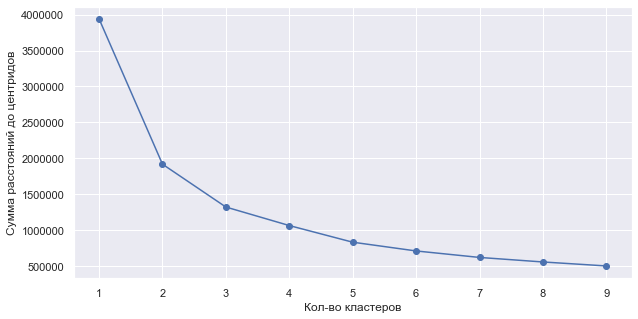

In [7]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, 10), d, marker='o')
plt.xlabel('Кол-во кластеров')
plt.ylabel('Сумма расстояний до центридов');

In [65]:
## Видим, что оптимальное количество кластеров 4

model = cluster.KMeans(n_clusters=2, init='k-means++', random_state=17)
y_model = model.fit_predict(pca_data)

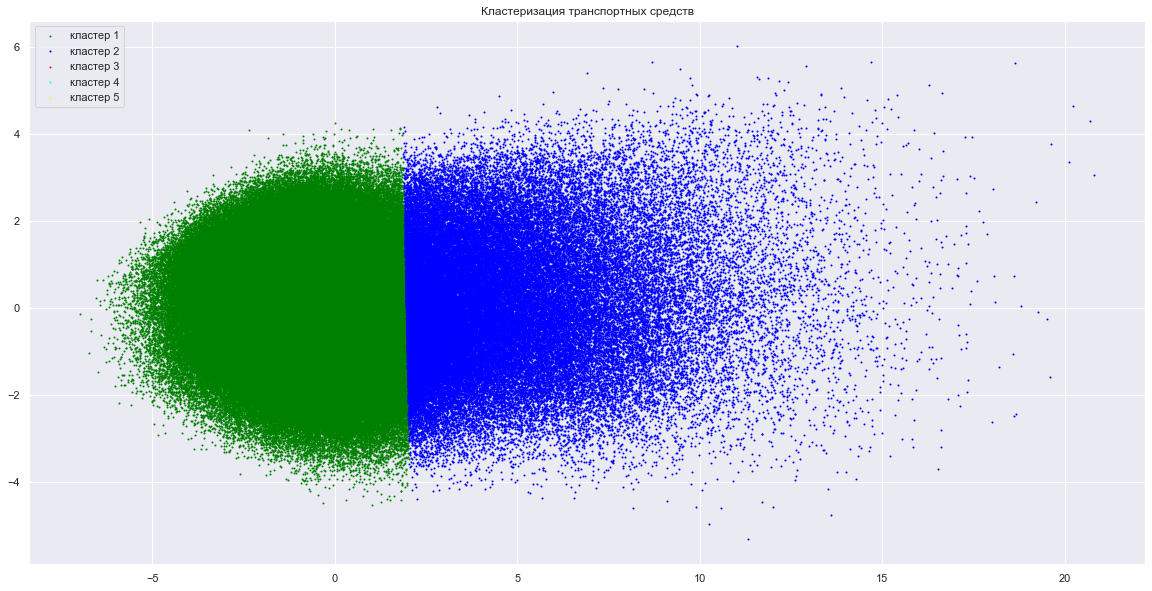

In [66]:
## Визуализируем модель

plt.figure(figsize=(20, 10))
plt.scatter(pca_data[y_model == 0, 0], pca_data[y_model == 0, 1], s=1, c='green', label='кластер 1')
plt.scatter(pca_data[y_model == 1, 0], pca_data[y_model == 1, 1], s=1, c='blue', label='кластер 2')
plt.scatter(pca_data[y_model == 2, 0], pca_data[y_model == 2, 1], s=1, c='red', label='кластер 3')
plt.scatter(pca_data[y_model == 3, 0], pca_data[y_model == 3, 1], s=1, c='cyan', label='кластер 4')
plt.scatter(pca_data[y_model == 4, 0], pca_data[y_model == 4, 1], s=1, c='yellow', label='кластер 5')
plt.title('Кластеризация транспортных средств')
plt.legend();

In [28]:
# ищем выбросы
from sklearn.ensemble import IsolationForest
import numpy as np

clf = IsolationForest( behaviour = 'new', max_samples=10000000, random_state = 1, contamination= 'auto')
preds = clf.fit_predict(pca_data)# -1 это выброс, 1 это нет
array_d = {}.fromkeys(preds, 0)
for a in preds:
    array_d[a] += 1

print(array_d)# смотрим сколько их получилось

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_iforest.py:255: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_iforest.py:288: UserWarning: max_samples (10000000) is greater than the total number of samples (416314). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples))


{1: 388138, -1: 28176}


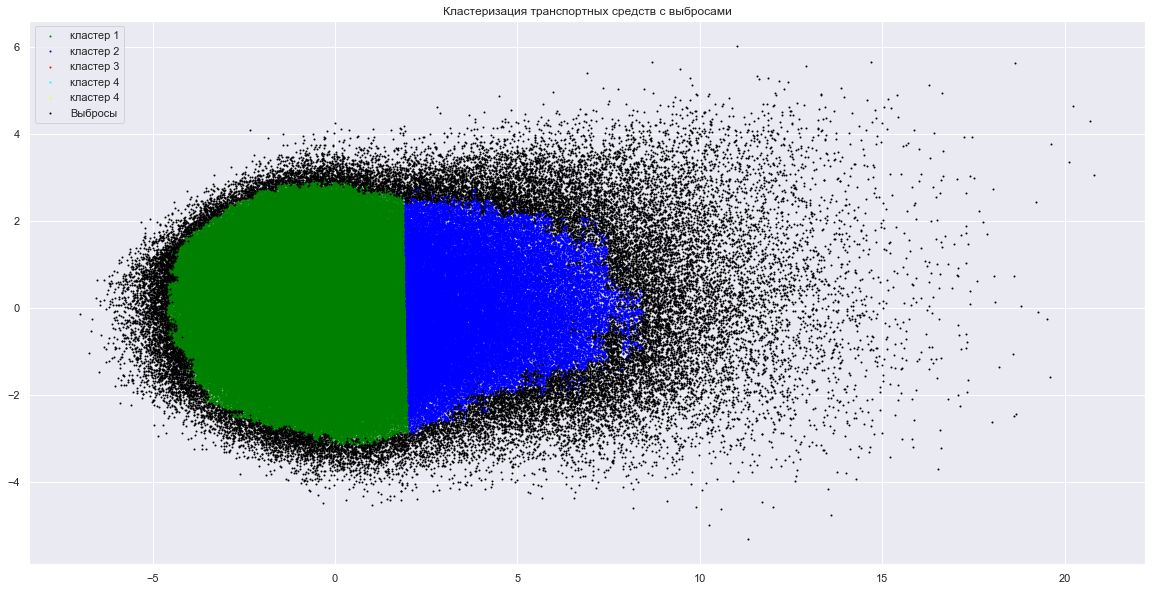

In [68]:
## Визуализируем модель с выбросами

plt.figure(figsize=(20, 10))
plt.scatter(pca_data[(y_model == 0)&(preds == 1), 0], pca_data[(y_model == 0)&(preds == 1), 1], s=1, c='green', label='кластер 1')
plt.scatter(pca_data[(y_model == 1)&(preds == 1), 0], pca_data[(y_model == 1)&(preds == 1), 1], s=1, c='blue', label='кластер 2')
plt.scatter(pca_data[(y_model == 2)&(preds == 1), 0], pca_data[(y_model == 2)&(preds == 1), 1], s=1, c='red', label='кластер 3')
plt.scatter(pca_data[(y_model == 3)&(preds == 1), 0], pca_data[(y_model == 3)&(preds == 1), 1], s=1, c='cyan', label='кластер 4')
plt.scatter(pca_data[(y_model == 4)&(preds == 1), 0], pca_data[(y_model == 4)&(preds == 1), 1], s=1, c='yellow', label='кластер 4')
plt.scatter(pca_data[preds == -1, 0], pca_data[preds == -1, 1], s=1, c='black', label='Выбросы')
#plt.scatter(pca_data[y_model == 5, 0], pca_data[y_model == 5, 1], s=100, c='white', label='кластер 4')
#plt.scatter(pca_data[y_model == 4, 0], pca_data[y_model == 4, 1], s=100, c='yellow', label='кластер 5')
plt.title('Кластеризация транспортных средств с выбросами')
plt.legend();

In [67]:
# Смотрим 2 метрики
import sklearn
print (sklearn.metrics.calinski_harabasz_score(pca_data, y_model))
sklearn.metrics.davies_bouldin_score(pca_data, y_model)

437727.3103528769


0.7370127856280303

In [69]:
import numpy as np
import pandas as pd




# берем структуру из заранее подготовленного файла
batch = pd.read_excel('id.xlsx')
batch['cluster'] = y_model # добавляем в нее результат кластеризации
batch['outlier'] = preds
batch.to_excel('predictions_cluster_efficientnet-b7_2dim.xlsx', index=False) # записываем результат на диск


In [70]:
# выводим первые 60 результатов, что бы сравнить с картинками
batch[['batch_id','id','cluster','outlier']].head(60)

,batch_id,id,cluster,outlier
0,1,1,0,1
1,1,2,0,1
2,1,3,1,1
3,1,4,0,1
4,1,5,0,1
5,1,6,0,1
6,2,7,0,1
7,2,8,1,1
8,2,9,0,1
9,2,10,0,1
